## Task-17

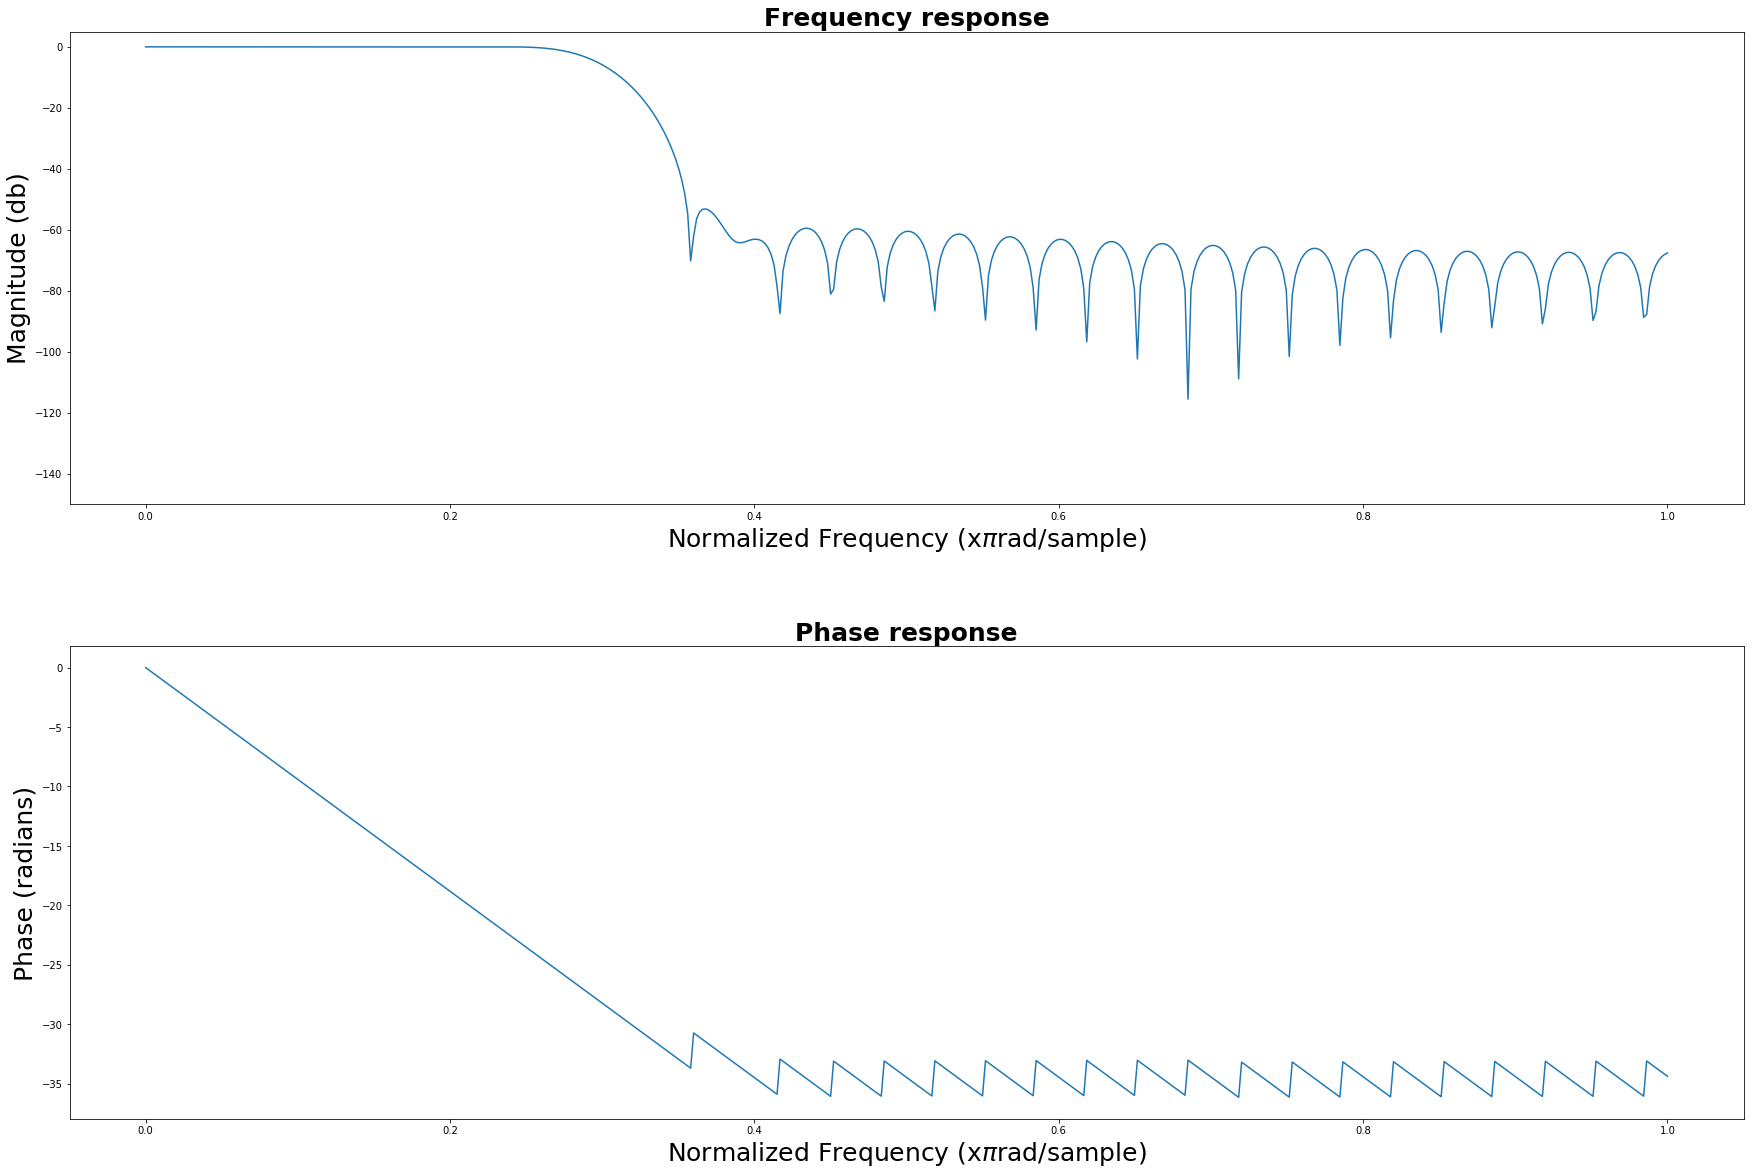

In [13]:
from pylab import *
import scipy.signal as signal

#Plot frequency and phase response
def mfreqz(b,a=1):
    plt.figure(figsize=(30, 20))
    w,h = signal.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    subplot(211)
    plot(w/max(w),h_dB)
    ylim(-150, 5)
    ylabel('Magnitude (db)', fontsize= 25)
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)', fontsize= 25)
    title(r'Frequency response', fontweight="bold", fontsize= 25)
    subplot(212)
    h_Phase = unwrap(arctan2(imag(h),real(h)))
    plot(w/max(w),h_Phase)
    ylabel('Phase (radians)', fontsize= 25)
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)', fontsize= 25)
    title(r'Phase response', fontweight="bold", fontsize= 25)
    subplots_adjust(hspace=0.3)

#Plot step and impulse response
def impz(b,a=1):
    plt.figure(figsize=(20,15))
    l = len(b)
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    response = signal.lfilter(b,a,impulse)
    subplot(211)
    stem(x, response)
    ylabel('Amplitude', fontsize= 25)
    xlabel(r'n (samples)', fontsize= 25)
    title(r'Impulse response', fontweight="bold", fontsize= 25)
    subplot(212)
    step = cumsum(response)
    stem(x, step)
    ylabel('Amplitude', fontsize= 25)
    xlabel(r'n (samples)',fontsize= 25 )
    title(r'Step response', fontweight="bold", fontsize= 25)
    subplots_adjust(hspace=0.3)
n = 61
a = signal.firwin(n, cutoff = 0.3, window = "hamming")
#Frequency and phase response
mfreqz(a)

## Task-18

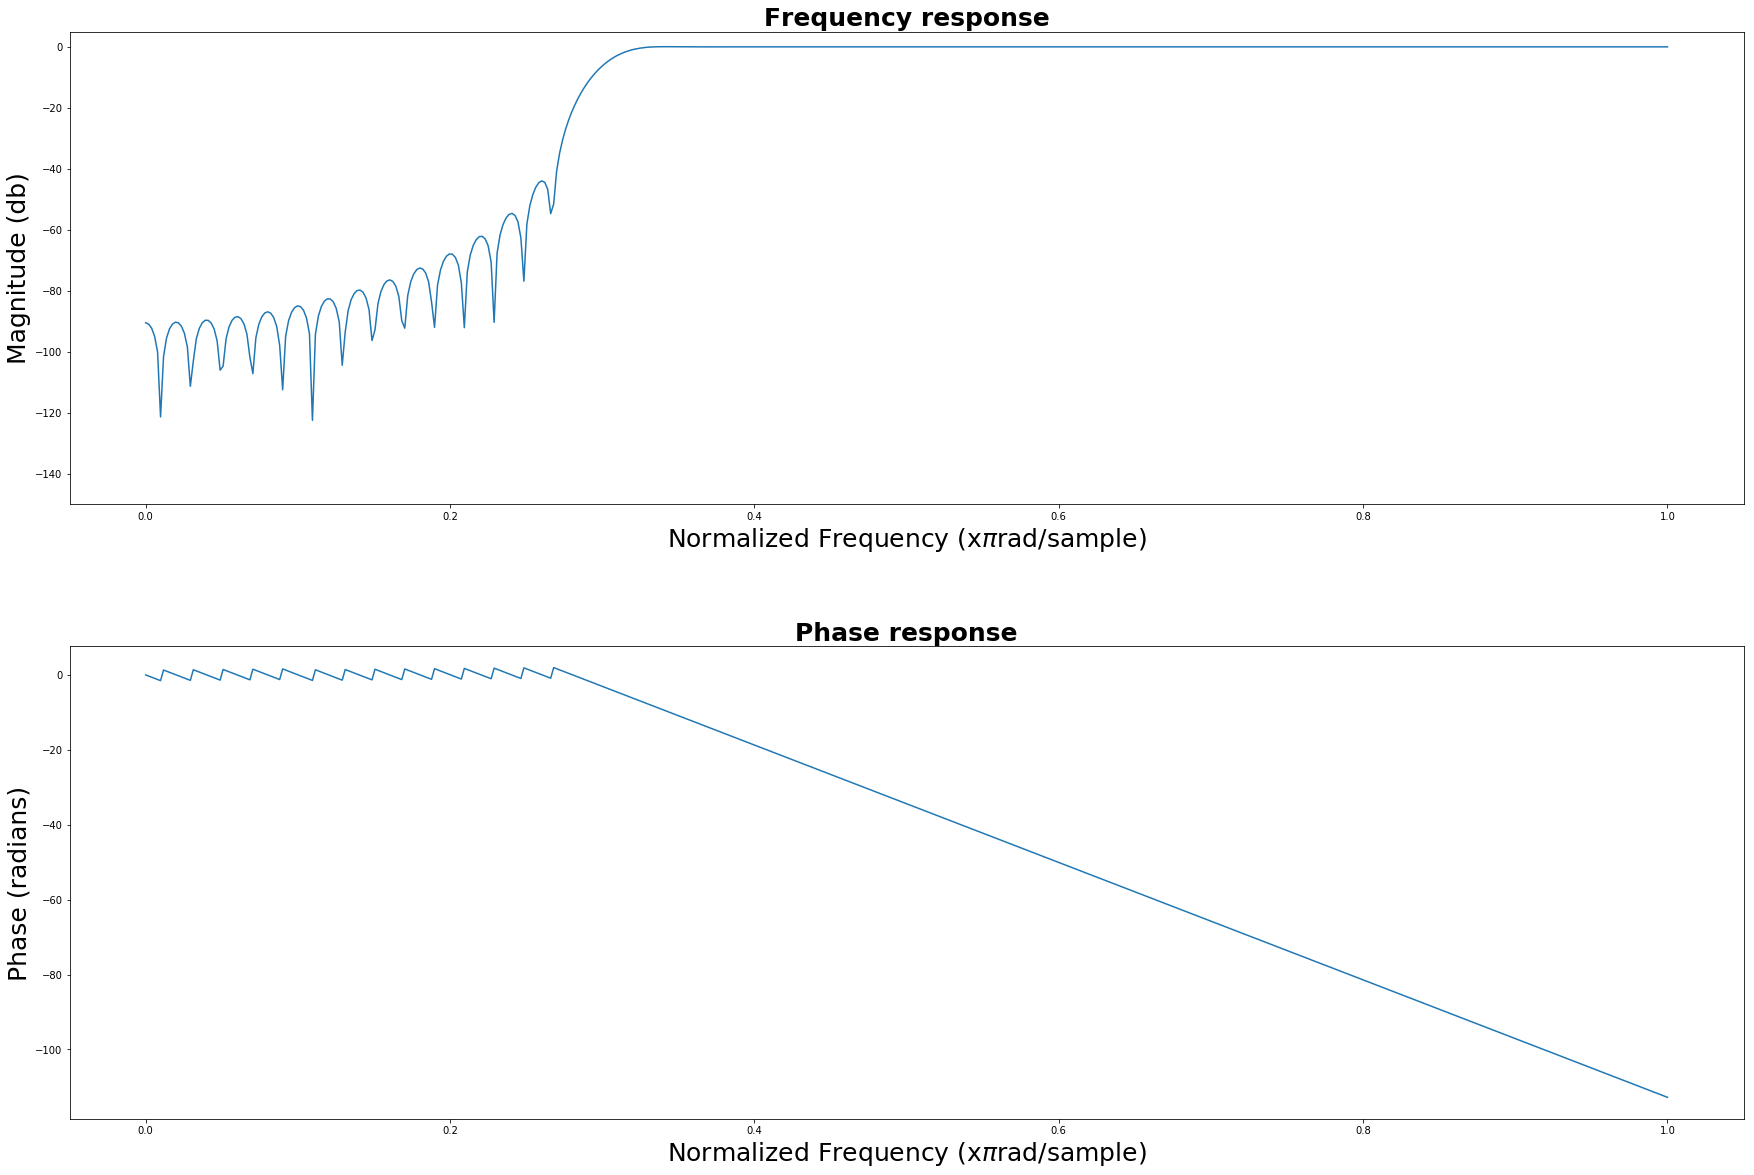

In [14]:
n = 101
a = signal.firwin(n, cutoff = 0.3, window = "hanning", pass_zero=False)
mfreqz(a)
show()

## Task-19

## Task-20

## Task-21


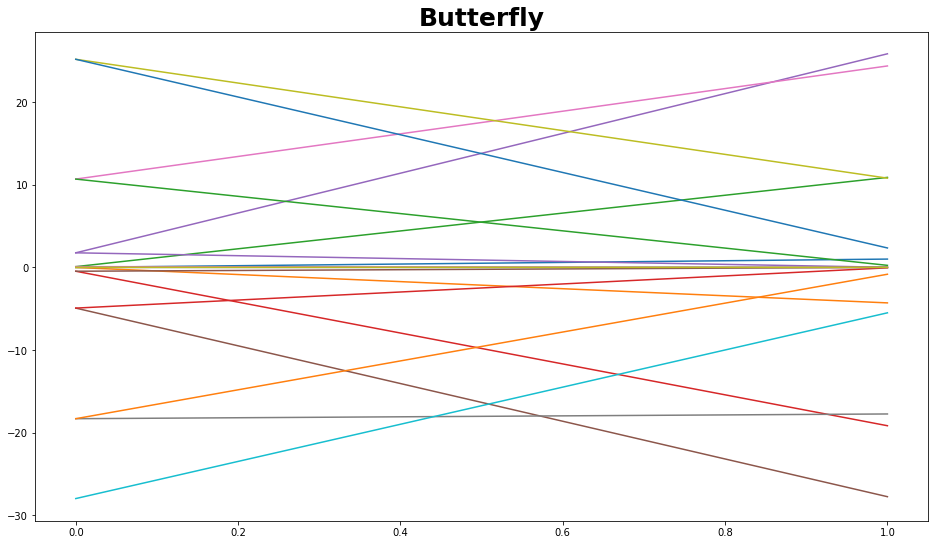

In [3]:
from numpy import *
from scipy import signal
from scipy.signal import filter_design as fd
from matplotlib import pyplot as plt

Wp = 0.412   
Ws = 0.270   
Rp = 0.1    
As = 60     
plt.figure(figsize=(16,9))
Filters = {'chebyshev' : (), 'butter' : ()}

Filters['butter'] = fd.iirdesign(Wp, Ws, Rp, As, ftype='butter')
Filters['chebyshev'] = fd.iirdesign(Wp, Ws, Rp, As, ftype='cheby1')

plt.plot(Filters['butter'])
plt.title('Butterfly', fontweight="bold", fontsize= 25)
plt.show()

In [6]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000.0
    lowcut = 500.0
    highcut = 1250.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.figure(figsize=(16,9))
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    nsamples = T * fs
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.figure(figsize=(16,9))
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left', {proc = '20'})

    plt.show()

SyntaxError: invalid syntax (<ipython-input-6-25d3f2ca6387>, line 65)